In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the dataset

In [7]:
data = pd.read_csv("walmartstore.csv")

In [9]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Convert date Type

In [11]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [14]:
# Aggregate weekly sales
data.set_index('Date', inplace=True)
weekly_sales = data.groupby(pd.Grouper(freq='W'))['Weekly_Sales'].sum()

# Display few rows

In [17]:
# Display the first few rows
print(weekly_sales.head())

Date
2010-01-10    12522138.16
2010-01-17           0.00
2010-01-24           0.00
2010-01-31           0.00
2010-02-07    28664780.93
Name: Weekly_Sales, dtype: float64


# Plot the sales trends

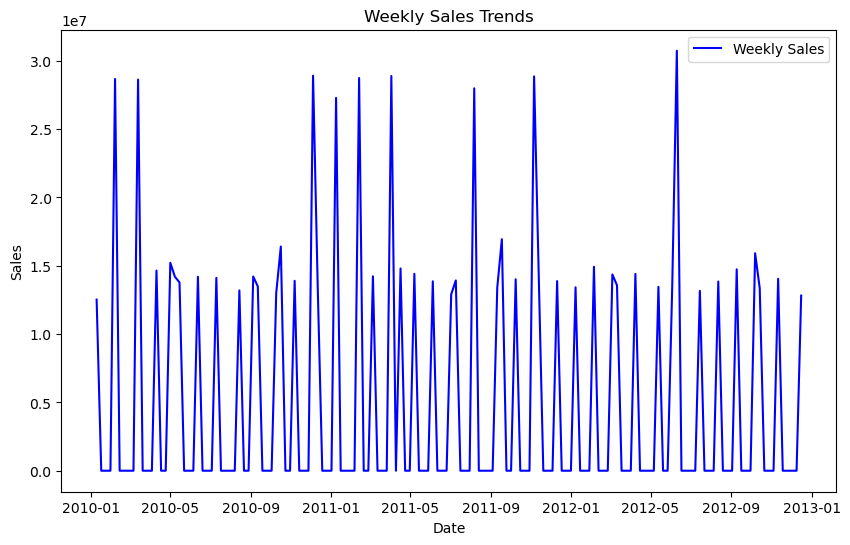

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Sales', color='blue')
plt.title("Weekly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step 2: Train-Test Split and SARIMA Model

In [25]:
# Split data into training and testing sets
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
result = model.fit()

C:\Users\Burhan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Burhan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Burhan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


# Forecast

In [28]:
forecast = result.forecast(steps=len(test))

# Evaluate model performance

In [31]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 8771732.033508852
Mean Absolute Error (MAE): 6309012.401085622


# Plot actual vs predicted sales

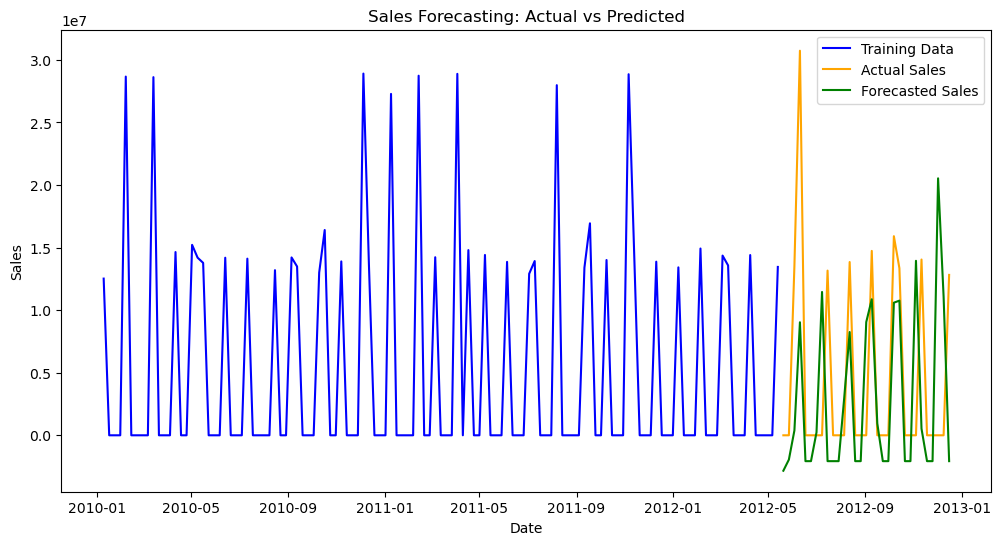

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data", color='blue')
plt.plot(test, label="Actual Sales", color='orange')
plt.plot(test.index, forecast, label="Forecasted Sales", color='green')
plt.title("Sales Forecasting: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()